# Tensorflow
- 다른 package, module에 비해서 살짝 특이한 형태의 library
- 다른 라이브러리는 필요한 위치에 필요한일을위해 필요한 것을 갖다 써
- Tensorflow는 전체적인 그래프를 만드는 library  
나중에 수행이될 그래프를 만듦
- Tensorflow는 3가지 구성요소로 이해하면 쉬워요!

 1. Node : 수학적인 연산을 담당, 데이터의 입출력을 담당
 2. edge : node와 node를 연결하는, 동적데이터를 노드로 실어 나르는 역할
 3. Tensor : 다차원배열형태의 동적 데이터

데이터가 흘러가는 그래프


In [7]:
import tensorflow as tf
# 첫번째 warning, 두번째부터 괜찮아짐

# 상수 node를 만드는 함수
node1 = tf.constant("Hello world!")

# graph를 실행시키기 위해서는 runner가 필요
# session이라고 불리는 runner를 생성해요!
# 2버전부터는 session 없어
sess = tf.Session()
# tensorflow 그래프를 실행시켜줄 수 있는 주체

sess.run(node1)
print(sess.run(node1))
# b'Hello world!'
# bite 형태의 문자열

print(sess.run(node1).decode())

b'Hello world!'
Hello world!


In [13]:
# 2개의 값을 더하는 tensorflow graph를 생성하고
# 실행시켜서 값을 구해보아요!

import tensorflow as tf

# tensorflow 는 주로 실수형태
node1 = tf.constant(10, dtype = tf.float32)
node2 = tf.constant(20, dtype = tf.float32)

node3 = node1 + node2

sess = tf.Session()

print(sess.run(node3))
print(sess.run([node1,node3]))

30.0
[10.0, 30.0]



- 위의 예시는 실행시키는 시점에 이미 각 노드의 값이 결정되어 있어요
- constant(상수이기 때문에)

만약 실행시키는 시점에 각노드의 값을 결정해서 실행시키려면 어떻게 해야하나요?

In [19]:
import tensorflow as tf

node1 = tf.placeholder(dtype = tf.float32)
node2 = tf.placeholder(dtype = tf.float32)

node3 = node1 + node2

sess = tf.Session()

result = sess.run(node3, feed_dict = {node1 : 10, node2 : 30})
# dictionary형태로 먹이를 준다

print("덧셈결과 : {}".format(result))

result = sess.run(node3, feed_dict = {node1 : input(),
                                      node2 : input()})

print("덧셈결과 : {}".format(result))

덧셈결과 : 40.0
20
30
덧셈결과 : 50.0


12-24

## Linear regression을 Tensorflow를 이용해서 구현해 보아요

#### 1. 필요한 module을 import

In [32]:
import tensorflow as tf

#### 2. training data set

In [44]:
x_data = [1,2,3]
y_data = [3,5,7]
# x데이터에 대한 y대응
# 상수보다 접시에서 parameter로 받아들이는 placeholder

#### 3. placeholder(tensorflowe그래프에 입력을 주기위한 파라미터 기능)

In [45]:
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

#### 4. Weight, Bias

In [46]:
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")
# 초기 W값을 랜덤으로
# 1차 함수 -> 1개필요

#### 5. Hypothesis

In [47]:
H = W * x + b
# 그래프는 H에 W,x,b가 각각 연결된 형태일 것
# 학습을 통해서 W,b 정해짐

#### 6. Cost function ( Loss function )

가설에서 y값을 빼고 그 값을 제곱해서 평균을 구해요!

최소 제곱법 표현

In [48]:
cost = tf.reduce_mean(tf.square(H - y))

#### 7. train node를 생성

gradient descent : 경사가 가장 빠른길로 가다보면 가장 빠른 길로 가게될 것!

In [49]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
# 경사하강법 알고리즘 구현해 놓은것
# 경사 급한곳 찾았을때 얼마나 이동할 건지는 우리가 정해준다

# learning_rate 정해져있는게 아니라 최적의값 찾아내야해

In [50]:
# cost가 최소가 되었을 때 W값
# cost 값을 줄여나감
train = optimizer.minimize(cost)
# 조금더 줄어든 cost값으로 한단계 나감
# 전체 node를 실행시켜주는 trigger역할

#### 8. 그래프를 실행시키기 위해서 runner(session)

Vaiable을 사용하면 학습하기 전에 반드시 초기화를 해야한다

In [51]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # 초기화

#### 9. learning작업(학습)

In [55]:
for step in range(3000):   # 3000번 반복해서 학습
# 학습데이터의 사이즈, 시간 정해줘야해
    _,w_val,cost_val,b_val = sess.run([train,W,cost,b],
                                      feed_dict={
                                          x: x_data,
                                          y: y_data
                                     })
    if step % 300 == 0:  # 300번째,600번째, 900번째,....3000번째 에서 값들을 그래프에 찍어보겠다
        print("train값 : {}, w값 : {}, b값 : {}, cost값 : {}".format(_,w_val,
                                                   b_val,
                                                   cost_val))
        
        # train은 값을 가지고 있지 않아!
        
# 학습이 끝났어요! => 최적의 W와 b값을 찾아내서 H를 만들었다

# prediction
print(sess.run(H, feed_dict = {x : 200}))

train값 : None, w값 : [2.0003974], b값 : [0.99909824], cost값 : 1.1719786385810949e-07
train값 : None, w값 : [2.0001945], b값 : [0.9995591], cost값 : 2.805828991370163e-08
train값 : None, w값 : [2.000096], b값 : [0.9997826], cost값 : 6.823862808147396e-09
train값 : None, w값 : [2.0000458], b값 : [0.9998957], cost값 : 1.5799438424224377e-09
train값 : None, w값 : [2.0000246], b값 : [0.99994594], cost값 : 4.2177816794719547e-10
train값 : None, w값 : [2.0000155], b값 : [0.99996674], cost값 : 1.678965161344692e-10
train값 : None, w값 : [2.000013], b값 : [0.99997246], cost값 : 1.1254996934439987e-10
train값 : None, w값 : [2.000013], b값 : [0.99997246], cost값 : 1.1254996934439987e-10
train값 : None, w값 : [2.000013], b값 : [0.99997246], cost값 : 1.1254996934439987e-10
train값 : None, w값 : [2.000013], b값 : [0.99997246], cost값 : 1.1254996934439987e-10
[401.0026]


#### Prediction

In [54]:
print(sess.run(H, feed_dict = {x : 200}))

[401.07877]


# 온도에 따른 Ozone 데이터를 학습한 후 Prediction까지 진행

### 필요한 module을 import

In [11]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# data loading
# 학습데이터를 확보해서 전처리 과정을 거쳐야 한다
df = pd.read_csv("./data/ozone.csv")

In [20]:
print("읽어들인 총 데이터의 shape : {}".format(df.shape))

df.head()


# 결측치 제거 시 다른 column에 의해 너무 많은 행이 제거되는걸 방지하기 위해 필요한 column만 추출
# 필요한 컬럼 뽑아내야해
# 불필요한 컬럼때문에 분석 안될수도있어
# fancy indexing

df = df[["Ozone","Temp"]]

# 결측치를 제거 (dropna() 이용)
# 결측치를 찾아서 지우고 그 지운 data frame을 리턴
df = df.dropna(how="any", inplace = False)  # inplace 복사본 만들건지 안만들건지
print("결측치를 제거한 후 남은 데이터 : {}".format(df.shape))

읽어들인 총 데이터의 shape : (153, 2)
결측치를 제거한 후 남은 데이터 : (116, 2)


### 이상치 제거

{'whiskers': [<matplotlib.lines.Line2D at 0x171494cc3c8>,
 'caps': [<matplotlib.lines.Line2D at 0x171494ccac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x171494cc278>],
 'medians': [<matplotlib.lines.Line2D at 0x171494d6198>],
 'fliers': [<matplotlib.lines.Line2D at 0x171494d64e0>],
 'means': []}

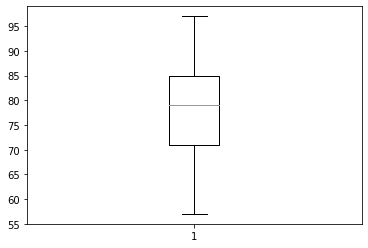

In [25]:
# 이번에는 이상치 확인 (box-plot)하여 제거해보자
# 각 column(온도와 오존)에 대해서 boxplot을 그려보아요

plt.boxplot(df["Temp"])   # 온도는 이상치가 존재하지 않는다



{'whiskers': [<matplotlib.lines.Line2D at 0x17149476128>,
 'caps': [<matplotlib.lines.Line2D at 0x171494767b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x17149469f98>],
 'medians': [<matplotlib.lines.Line2D at 0x17149476dd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x17149483160>],
 'means': []}

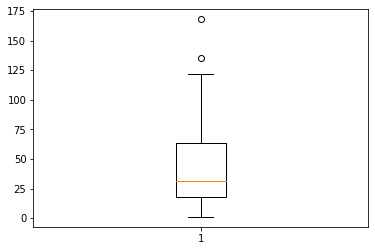

In [24]:
plt.boxplot(df["Ozone"])    # 오존데이터에는 이상치가 존재한다

- 이상치를 찾기 위해서 Tukey Fence 방식을 이용 (IRQ방식 이용)
- IRQ값은 3사분위값 - 1사분위값을 계산해서 구한다
- 만약 (3사분위값 + IRQ * 1.5) 을 초과하는 값이 존재하면 이상치
- 만약 (1사분위값 - IRQ * 1.5) 미만의 값이 존재하면 이상치

In [39]:
q1,q3 = np.percentile(df["Ozone"],[25,75])
irq = q3 - q1
upper = q3 + irq*1.5
print(upper)
mask = df["Ozone"] > upper  ## mask
df=df.loc[~mask]     # ~ 'not'의 의미
print("이상치를 제거한 후 남은 데이터 : {}".format(df.shape))
df.head()

124.25
이상치를 제거한 후 남은 데이터 : (114, 2)


,Ozone,Temp
0,41.0,67
1,36.0,72
2,12.0,74
3,18.0,62
5,28.0,66


## Linear regression 을 하기전에 데이터의 경향성을 확인
산점도 (scatter) 를 이용해서 데이터의 경향성을 확인해보자

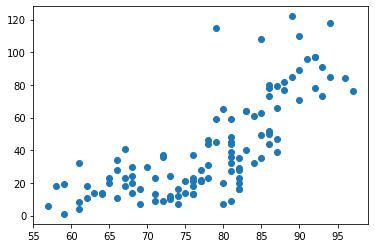

In [40]:
plt.scatter(df["Temp"],df["Ozone"])

### linear regression
1. training data set 준비

In [42]:
x_data = df["Temp"]
y_data = df["Ozone"]

2. 입력을 받아들이는 node인 placeholder 를 정의

In [43]:
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

3. Weight & bias 를 정의

In [44]:
W = tf.Variable(tf.random_normal([1]), name = "weigth")
b = tf.Variable(tf.random_normal([1]), name = "bias")

4. 가설(Hypothesis) 정의

In [46]:
H = W * x + b

5. cost function 정의

In [47]:
cost = tf.reduce_mean(tf.square(H - y))

6. train

In [61]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

7. session 초기화 작업

In [62]:
sess = tf.Session()   # Graph를 실행시키기 위해 필요해요!
sess.run(tf.global_variables_initializer())

8. 학습

In [63]:
for step in range(3000):
    _, cost_val = sess.run([train,cost],
                  feed_dict = { x : x_data,
                                y : y_data})
    # cost 값을 봐야해 W나 b는 나중에 봐도돼
    if step % 300 == 0:
        print("cost값은 : {}".format(cost_val))
        
# 학습이 안되는거!!!! 발산함

cost값은 : 3561.1005859375
cost값은 : nan
cost값은 : nan
cost값은 : nan
cost값은 : nan
cost값은 : nan
cost값은 : nan
cost값은 : nan
cost값은 : nan
cost값은 : nan


In [76]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.0001)
train = optimizer.minimize(cost)

sess = tf.Session()   # Graph를 실행시키기 위해 필요해요!
sess.run(tf.global_variables_initializer())

for step in range(3000):
    _, cost_val = sess.run([train,cost],
                  feed_dict = { x : x_data,
                                y : y_data})
    # cost 값을 봐야해 W나 b는 나중에 봐도돼
    if step % 300 == 0:
        print("cost값은 : {}".format(cost_val))
        
# 이렇게 나오는 이유는 데이터에 문제
# 데이터 사이즈가 크면 클수록 데이터 차이가 작으면작을수록 

cost값은 : 1.2704720497131348
cost값은 : 1.0929895639419556
cost값은 : 0.9408282041549683
cost값은 : 0.8103741407394409
cost값은 : 0.6985318660736084
cost값은 : 0.602645754814148
cost값은 : 0.5204386711120605
cost값은 : 0.4499594569206238
cost값은 : 0.3895350396633148
cost값은 : 0.33773159980773926


- 정제된 데이터를 정규화나 표준화를 이용해서 값의 범위를 조절해야해요!

    => 그래야 학습이 정상적으로 이루어질 수 있어요!

정제된 데이터를 정규화나 표준화를 이용해서 값의 범위를 조절해야 해요!

=> 그래야 학습이 정상적으로 이루어질 수 있어요

데이터를 표준화 방식으로 다시 만들어서 학습을 진행

Normalization(표준화) 
- 각 데이터를 다음과 같은 방식으로 비율적으로 축소시키는 방식
- 각 요소의 값 => (요소값 - 전체데이터의 최소값)
                  (전체 데이터의 최대값 - 전체 데이터의 최소값)
                  

In [74]:
df["Temp_Norm"]=(df["Temp"] - df["Temp"].min()) / (df["Temp"].max() - df["Temp"].min())
# 결과는 series로 나올 것 -> 모든 온도값 조절된 값으로 출력
df["Ozone_Norm"]=(df["Ozone"] - df["Ozone"].min()) / (df["Ozone"].max() - df["Ozone"].min())
df.head()

,Ozone,Temp,Temap_Norm,Ozone_Norm,Temp_Norm
0,41.0,67,0.250,0.330579,0.250
1,36.0,72,0.375,0.289256,0.375
2,12.0,74,0.425,0.090909,0.425
3,18.0,62,0.125,0.140496,0.125
5,28.0,66,0.225,0.223140,0.225


확인작업

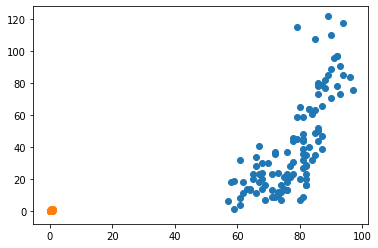

In [75]:
plt.scatter(df["Temp"],df["Ozone"])
plt.scatter(df["Temp_Norm"],df["Ozone_Norm"])

In [97]:
x_data = df["Temp_Norm"]
y_data = df["Ozone_Norm"]

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

sess = tf.Session()   # Graph를 실행시키기 위해 필요해요!
sess.run(tf.global_variables_initializer())

for step in range(3000):
    _, cost_val = sess.run([train,cost],
                  feed_dict = { x : x_data,
                                y : y_data})
    # cost 값을 봐야해 W나 b는 나중에 봐도돼
    if step % 300 == 0:
        print("cost값은 : {}".format(cost_val))

cost값은 : 2.045564651489258
cost값은 : 0.026380550116300583
cost값은 : 0.02628171071410179
cost값은 : 0.026223648339509964
cost값은 : 0.026189418509602547
cost값은 : 0.026169247925281525
cost값은 : 0.026157356798648834
cost값은 : 0.02615034393966198
cost값은 : 0.026146212592720985
cost값은 : 0.02614377811551094


학습이 종료된 후 최종적으로 얻은 W와 b의 값을 이용하여 line graph를 산점도와 함께 그려보아요

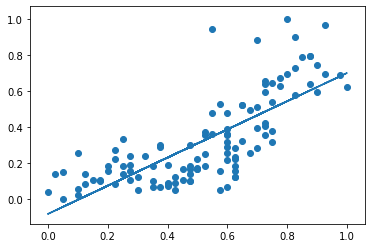

In [98]:
plt.scatter(df["Temp_Norm"],df["Ozone_Norm"])
plt.plot(df["Temp_Norm"],df["Temp_Norm"]*sess.run(W) +sess.run(b))

학습이 끝났으니 Prediction을 해 보아요

화씨 62도에서 오존량을 예측해 보아요!

In [99]:
# 좌표계가 다르므로 62대입해서는 안돼!
print(sess.run(H, feed_dict={x:62}))

tmp = (81 - df["Temp"].min()) / (df["Temp"].max() - df["Temp"].min())
result_norm = sess.run(H, feed_dict = {x : tmp})
result = result_norm * (df["Ozone"].max()-df["Ozone"].min())+df["Ozone"].min()
print(result)

[47.779583]


12-26

## 단순선형회귀(simple linear regression)
- 데이터는 온도에 따른 오존량의 측정치를 이용한다

In [26]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
# 그래프 기반이되는 모듈
from scipy import stats
# 사이파이의 여러기능 중 통계기능 이용하겠어
# 사이파이 prompt에서 설치해야해 (블로그참고)

### 1. data loading ( raw data loading )

In [46]:
df = pd.read_csv("./data/ozone.csv")
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


### 2. 데이터의 전처리를 진행 ( Data Pre processing )
#### 2-1. 필요한 column부터 추출
- 여러개의 컬럼 뽑아야하니 fancy indexing 이용해야해

In [47]:
df = df[["Ozone","Temp"]]
df.head()

,Ozone,Temp
0,41.0,67
1,36.0,72
2,12.0,74
3,18.0,62
4,NaN,56


#### 2-2. 결측치 처리

In [48]:
print(df.shape)

df = df.dropna(how = "any", inplace = False)   # 처리된 return값
print(df.shape)

(153, 2)
(116, 2)


#### 2-3. 이상치 처리 (Tukey Fences방식이용 - IQR기반)
- 이상치가 존재하는지 확인 => boxplot으로 확인
- IQR값을 구해서 이를 이용해 상위, 하위 이상치의 바운더리를 계산
- IQR = 3사분위값 - 1사분위값

{'whiskers': [<matplotlib.lines.Line2D at 0x2273eb719b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2273eb7d0f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2273eb71860>],
 'medians': [<matplotlib.lines.Line2D at 0x2273eb7d780>],
 'fliers': [<matplotlib.lines.Line2D at 0x2273eb7dac8>],
 'means': []}

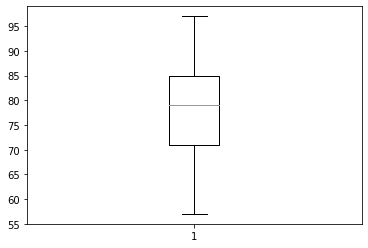

In [49]:
plt.boxplot(df["Temp"])
# 상위 이상치/하위 이상치 둘 다 존재하지 않음

{'whiskers': [<matplotlib.lines.Line2D at 0x2273ebdb0b8>,
 'caps': [<matplotlib.lines.Line2D at 0x2273ebdb7b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2273ebd0f28>],
 'medians': [<matplotlib.lines.Line2D at 0x2273ebdbe48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2273ebe71d0>],
 'means': []}

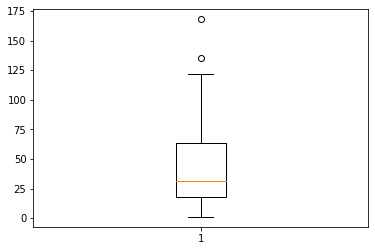

In [50]:
plt.boxplot(df["Ozone"])
# 상위 이상치가 존재하기 때문에 없애줘야해

In [58]:
q1,q3 = np.percentile(df["Ozone"],[25,75])
# 두개의 값 알기 위해 -> [] list 써줌 
iqr = q3 - q1
upper = q3 + irq * 1.5   # 131.125가 상위 이상치를 처리하기 위한 경계값
print(upper)
mask = df["Ozone"] > upper    # boolean mask를 생성
df = df.loc[~mask]
display(df)
print(df.shape)

124.25


,Ozone,Temp,Temp_Norm,Ozone_Norm
0,41.0,67,0.250,0.330579
1,36.0,72,0.375,0.289256
2,12.0,74,0.425,0.090909
3,18.0,62,0.125,0.140496
5,28.0,66,0.225,0.223140
...,...,...,...,...
147,14.0,63,0.150,0.107438
148,30.0,70,0.325,0.239669
150,14.0,75,0.450,0.107438
151,18.0,76,0.475,0.140496


(114, 4)


#### 2-4. 데이터가 선형적 관계에 있는지를 확인
- scatter(산점도)를 이용하면 데이터의 관계를 쉽게 파악할 수 있다

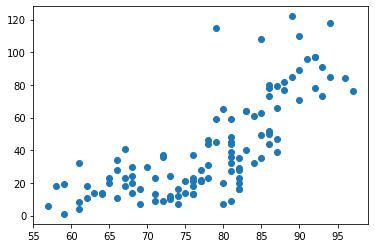

In [52]:
plt.scatter(df["Temp"],df["Ozone"])

#### 2-5. 정규화 혹은 표준화를 이용해서 데이터의 scale 변환
- 정규화(Normalization) = (요소값 - 최소값) / (최대값 - 최소값)
    - => 0 ~ 1 사이의 값으로 scale
- 표준화(Standardization) = (요소값 - 평균) / 표준편차
    - => -1 ~ 1 사이의 값으로 scale
- 둘 다 수행해봐서 학습결과가 좋은놈으로 골라야해
- 정규화방식을 이용해서 데이터를 변형
- 일반적으로는 module을 이용, 우리는 프로그램으로 처리

In [57]:
df["Temp_Norm"] = (df["Temp"] - df["Temp"].min()) / (df["Temp"].max() - df["Temp"].min())
df["Ozone_Norm"] = (df["Ozone"] - df["Ozone"].min()) / (df["Ozone"].max() - df["Ozone"].min())
df.head()

# 학습에 적합한 데이터를 완성!

,Ozone,Temp,Temp_Norm,Ozone_Norm
0,41.0,67,0.250,0.330579
1,36.0,72,0.375,0.289256
2,12.0,74,0.425,0.090909
3,18.0,62,0.125,0.140496
5,28.0,66,0.225,0.223140


## Machine Learning (Tensorflow )
### 1. training data set

In [59]:
x_data = df["Temp_Norm"]
y_data = df["Ozone_Norm"]

### 2. placeholder

In [60]:
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

### 3. Weigth & bias

In [61]:
W = tf.Variable(tf.random_normal([1]), name = "weight")    # [1] <- shape이라고 보면됨
b = tf.Variable(tf.random_normal([1]), name = "bias")

### 4. Hypothesis

In [64]:
H = W * x + b

### 5. cost function

In [68]:
cost = tf.reduce_mean(tf.square(H-y))

### 6. train

In [70]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
# cost값을 미분으로 단계적으로 줄여나가는 과정
# 얼마나 w값을 줄여나가면서 cost값을 구하는지
train = optimizer.minimize(cost)
# 한번수행하면 미분 한번 실행한거야
# 최적의 W를 찾아가는것

### 7. session, 초기화

In [71]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 그래프를 초기화 시키고 수행시키는

### 8. 학습

In [72]:
for step in range(3000):   # 전체 3000번 수행
    _, cost_val = sess.run([train,cost],
                          feed_dict={x : x_data,
                                     y : y_data})
    if step % 300 == 0:
        print("cost값 : {}".format(cost_val))
        
# 0으로 가까워질 수록 좋은것

cost값 : 0.8619776368141174
cost값 : 0.05302271619439125
cost값 : 0.04198679327964783
cost값 : 0.03548142686486244
cost값 : 0.03164668381214142
cost값 : 0.029386179521679878
cost값 : 0.028053663671016693
cost값 : 0.027268169447779655
cost값 : 0.026805143803358078
cost값 : 0.02653220109641552


- 최적의 W와 b를 구했다 => 가설을 완성

## prediction
- 온도가 (화씨)80 일때 Ozone량을 알고 싶다

In [73]:
print(sess.run(H, feed_dict={ x : 80 }))
# 이렇게 처리하면 문제가 있다
# scale된 데이터로 만든 것이기 때문에 prediction할 수 없어

[56.875683]


- 80이란 온도를 0~1사이의 값으로 scale

In [76]:
tmp = (80 - df["Temp"].min()) / (df["Temp"].max() - df["Temp"].min(0))
print(tmp)
print(sess.run(H, feed_dict={ x : tmp }))
# 예측한 Ozone값
# 원래 상태로 돌려줘야해
result_scale = sess.run(H, feed_dict={ x : tmp })
result = result_scale * (df["Ozone"].max()-df["Ozone"].min() + df["Ozone"].min())
print(result)   # 45

0.575
[0.36489686]
[44.517418]


######################################################################################

## scipy의 stats module을 이용해서 편하게 처리

In [79]:
x = df["Temp"]
y = df["Ozone"]
# 실데이터를 가지고 바로 이용
# 전처리는 해줘야해

result = stats.linregress(x,y)
print(result)
print(80*result[0] + result[1])   # 45
# 학습이 끝나고 바로 보여줄 수 있어

LinregressResult(slope=2.344807849550286, intercept=-142.19084219133276, rvalue=0.7515377011359844, pvalue=5.802324426210489e-22, stderr=0.19448560867502498)
45.39378577269011


# multiple linear regression(다중선형회귀)
- 독립변수가 2개 이상인 경우
- Hypothesis가 변경
- 단순선형회귀 => H = Wx + b
- 다중선형회귀 => H = w1x1 + w2x2 + w3x3 + b
- 결국 matrix형태로 W와 x가 표현된다
- H = matmul(X,W) + b

## 퀴즈성적을 이용한 최종시험성적 예측
- 사용하는 데이터
- 퀴즈1 퀴즈2 퀴즈3 최종성적
-  73    80    75     152
-  93    88    93     185
-  89    91    90     180
-  96    98   100     196
-  73    66    70     142
-  80    90    50      ??  (prediction)

#### training data set

In [606]:
x_data = df["Temp"]
# 1차원이였어

x_data = [[73, 80, 75],
          [93, 88, 93],
          [89, 91, 90],
          [96, 98, 100],
          [73, 66, 70]]

y_data = [[152], [185], [180], [196], [142]]



#### placeholder

In [607]:
X = tf.placeholder(shape=[None,3], dtype = tf.float32)
# 행은 몇개들어올지 몰라
# 1행 3열의 행을 알아보고싶은데 [5,3]으로하면 나중에 [1,3]짜리를 못집어넣음
# 따라서 행의 갯수는 관여하지 않겠다 None으로 써줌
Y = tf.placeholder(shape=[None,1], dtype = tf.float32)

#### Weight & bias

In [608]:
W = tf.Variable(tf.random_normal([3,1]), name = "wieght")
b = tf.Variable(tf.random_normal([1]),name = "bias")

#### Hypothesis

In [609]:
# H = W * x + b
H = tf.matmul(X,W)+ b
# 행렬곱이므로

#### Cost function
여기서부터는 동일

In [610]:
cost = tf.reduce_mean(tf.square(H-Y))

### 6. train

In [611]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.00001)
# cost값을 미분으로 단계적으로 줄여나가는 과정
# 얼마나 w값을 줄여나가면서 cost값을 구하는지
train = optimizer.minimize(cost)
# 한번수행하면 미분 한번 실행한거야
# 최적의 W를 찾아가는것

### 7. session, 초기화

In [612]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 그래프를 초기화 시키고 수행시키는

### 8. 학습

In [613]:
for step in range(30000):   # 전체 3000번 수행
    _, cost_val = sess.run([train,cost],
                          feed_dict={X : x_data,
                                     Y : y_data})
    if step % 3000 == 0:
        print("cost값 : {}".format(cost_val))
        
# 0으로 가까워질 수록 좋은것

cost값 : 397.3356628417969
cost값 : 4.416423797607422
cost값 : 1.252854824066162
cost값 : 0.6008899211883545
cost값 : 0.44704097509384155
cost값 : 0.3946453928947449
cost값 : 0.36519917845726013
cost값 : 0.342856228351593
cost값 : 0.32415086030960083
cost값 : 0.30810633301734924


- 최적의 W와 b를 구했다 => 가설을 완성

## prediction
- 온도가 (화씨)80 일때 Ozone량을 알고 싶다

In [614]:
print(sess.run(H, feed_dict={ X : [[80,90,50]] }))
# 이렇게 처리하면 문제가 있다
# scale된 데이터로 만든 것이기 때문에 prediction할 수 없어

[[163.778]]


- 80이란 온도를 0~1사이의 값으로 scale

In [76]:
a = (80 - df["Temp"].min()) / (df["Temp"].max() - df["Temp"].min(0))
b = (90 - df["Temp"].min()) / (df["Temp"].max() - df["Temp"].min(0))
c = (50 - df["Temp"].min()) / (df["Temp"].max() - df["Temp"].min(0))
print(tmp)
print(sess.run(H, feed_dict={ x : tmp }))
# 예측한 Ozone값
# 원래 상태로 돌려줘야해
result_scale = sess.run(H, feed_dict={ x : tmp })
result = result_scale * (df["Ozone"].max()-df["Ozone"].min() + df["Ozone"].min())
print(result)   # 45

0.575
[0.36489686]
[44.517418]


## 다중선형회귀 연습문제
- 관측된 Solar.R, Wind, Temp에 대한 Ozone 량에 대한 데이터를 이용하여 machine learning을 진행하고
- Solar.R : 170, Wind : 7.4, Temp : 67 에 대한
- Ozone수치를 예측하라

### 1. data loading ( raw data loading )

In [573]:
df = pd.read_csv("./data/ozone.csv")
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


### 2. 데이터의 전처리를 진행 ( Data Pre processing )
#### 2-1. 필요한 column부터 추출
- 여러개의 컬럼 뽑아야하니 fancy indexing 이용해야해

In [574]:
df = df[["Ozone","Solar.R","Wind","Temp"]]
df.head()

,Ozone,Solar.R,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
4,NaN,NaN,14.3,56


#### 2-2. 결측치 처리

In [575]:
print(df.shape)

df = df.dropna(how = "any", inplace = False)   # 처리된 return값
print(df.shape)

(153, 4)
(111, 4)


#### 2-3. 이상치 처리 (Tukey Fences방식이용 - IQR기반)
- 이상치가 존재하는지 확인 => boxplot으로 확인
- IQR값을 구해서 이를 이용해 상위, 하위 이상치의 바운더리를 계산
- IQR = 3사분위값 - 1사분위값

{'whiskers': [<matplotlib.lines.Line2D at 0x2274e02dac8>,
 'caps': [<matplotlib.lines.Line2D at 0x2274df9b208>,
 'boxes': [<matplotlib.lines.Line2D at 0x2274e02d978>],
 'medians': [<matplotlib.lines.Line2D at 0x2274df9b898>],
 'fliers': [<matplotlib.lines.Line2D at 0x2274df9bbe0>],
 'means': []}

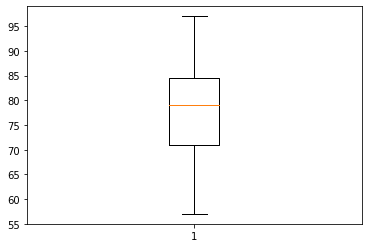

In [576]:
plt.boxplot(df["Temp"])
# 상위 이상치/하위 이상치 둘 다 존재하지 않음

{'whiskers': [<matplotlib.lines.Line2D at 0x22750057160>,
 'caps': [<matplotlib.lines.Line2D at 0x22750057860>,
 'boxes': [<matplotlib.lines.Line2D at 0x22750049fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x22750057ef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22750062278>],
 'means': []}

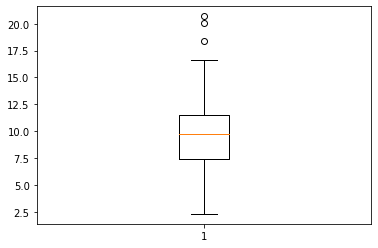

In [577]:
plt.boxplot(df["Wind"])

{'whiskers': [<matplotlib.lines.Line2D at 0x227500b6710>,
 'caps': [<matplotlib.lines.Line2D at 0x227500b6e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x227500b65c0>],
 'medians': [<matplotlib.lines.Line2D at 0x227500c04e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x227500c0828>],
 'means': []}

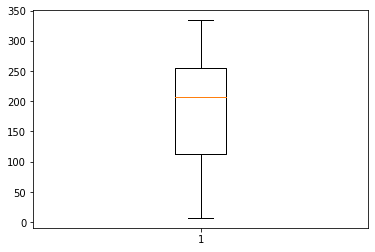

In [578]:
plt.boxplot(df["Solar.R"])

{'whiskers': [<matplotlib.lines.Line2D at 0x22750113c50>,
 'caps': [<matplotlib.lines.Line2D at 0x2275011e390>,
 'boxes': [<matplotlib.lines.Line2D at 0x22750113b00>],
 'medians': [<matplotlib.lines.Line2D at 0x2275011ea20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2275011ed68>],
 'means': []}

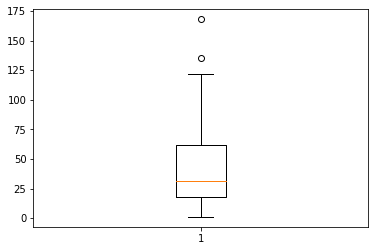

In [579]:
plt.boxplot(df["Ozone"])
# 상위 이상치가 존재하기 때문에 없애줘야해

In [580]:
q1,q3 = np.percentile(df["Ozone"],[25,75])
# 두개의 값 알기 위해 -> [] list 써줌 
iqr = q3 - q1
upper = q3 + iqr * 1.5   # 131.125가 상위 이상치를 처리하기 위한 경계값
print(upper)
mask = df["Ozone"] > upper    # boolean mask를 생성
df = df.loc[~mask]
display(df)
print(df.shape)

128.0


,Ozone,Solar.R,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
6,23.0,299.0,8.6,65
...,...,...,...,...
147,14.0,20.0,16.6,63
148,30.0,193.0,6.9,70
150,14.0,191.0,14.3,75
151,18.0,131.0,8.0,76


(109, 4)


In [581]:
q1,q3 = np.percentile(df["Wind"],[25,75])
# 두개의 값 알기 위해 -> [] list 써줌 
iqr = q3 - q1
upper = q3 + iqr * 1.5   # 131.125가 상위 이상치를 처리하기 위한 경계값
print(upper)
mask = df["Wind"] > upper    # boolean mask를 생성
df = df.loc[~mask]
display(df)
print(df.shape)

17.65


,Ozone,Solar.R,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
6,23.0,299.0,8.6,65
...,...,...,...,...
147,14.0,20.0,16.6,63
148,30.0,193.0,6.9,70
150,14.0,191.0,14.3,75
151,18.0,131.0,8.0,76


(106, 4)


#### 2-4. 데이터가 선형적 관계에 있는지를 확인
- scatter(산점도)를 이용하면 데이터의 관계를 쉽게 파악할 수 있다

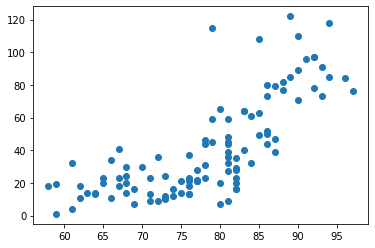

In [582]:
plt.scatter(df["Temp"],df["Ozone"])

#### 2-5. 정규화 혹은 표준화를 이용해서 데이터의 scale 변환
- 정규화(Normalization) = (요소값 - 최소값) / (최대값 - 최소값)
    - => 0 ~ 1 사이의 값으로 scale
- 표준화(Standardization) = (요소값 - 평균) / 표준편차
    - => -1 ~ 1 사이의 값으로 scale
- 둘 다 수행해봐서 학습결과가 좋은놈으로 골라야해
- 정규화방식을 이용해서 데이터를 변형
- 일반적으로는 module을 이용, 우리는 프로그램으로 처리

In [583]:
df["Solar.R_Norm"] = (df["Solar.R"] - df["Solar.R"].min()) / (df["Solar.R"].max() - df["Solar.R"].min())
df["Wind_Norm"] = (df["Wind"] - df["Wind"].min()) / (df["Wind"].max() - df["Wind"].min())
df["Temp_Norm"] = (df["Temp"] - df["Temp"].min()) / (df["Temp"].max() - df["Temp"].min())
df["Ozone_Norm"] = (df["Ozone"] - df["Ozone"].min()) / (df["Ozone"].max() - df["Ozone"].min())
df.head()

# 학습에 적합한 데이터를 완성!

,Ozone,Solar.R,Wind,Temp,Solar.R_Norm,Wind_Norm,Temp_Norm,Ozone_Norm
0,41.0,190.0,7.4,67,0.559633,0.356643,0.230769,0.330579
1,36.0,118.0,8.0,72,0.339450,0.398601,0.358974,0.289256
2,12.0,149.0,12.6,74,0.434251,0.720280,0.410256,0.090909
3,18.0,313.0,11.5,62,0.935780,0.643357,0.102564,0.140496
6,23.0,299.0,8.6,65,0.892966,0.440559,0.179487,0.181818


## Machine Learning (Tensorflow )
### 1. training data set

In [584]:
x_data = df[["Solar.R_Norm","Wind_Norm","Temp_Norm"]].values
print(x_data)
y_data = df["Ozone_Norm"].values.reshape(-1,1)
print(y_data)
# 1열로 해서 나머지를 다 채워

[[0.55963303 0.35664336 0.23076923]
 [0.33944954 0.3986014  0.35897436]
 [0.43425076 0.72027972 0.41025641]
 [0.93577982 0.64335664 0.1025641 ]
 [0.89296636 0.44055944 0.17948718]
 [0.28134557 0.8041958  0.02564103]
 [0.76146789 0.51748252 0.28205128]
 [0.86544343 0.48251748 0.20512821]
 [0.81651376 0.6013986  0.25641026]
 [0.17737003 0.76223776 0.        ]
 [1.         0.64335664 0.15384615]
 [0.91743119 0.67832168 0.20512821]
 [0.96330275 0.64335664 0.25641026]
 [0.11314985 0.51748252 0.1025641 ]
 [0.0030581  0.51748252 0.02564103]
 [0.95718654 1.         0.38461538]
 [0.05504587 0.51748252 0.07692308]
 [0.25993884 0.67832168 0.07692308]
 [0.01834862 0.67832168 0.23076923]
 [0.74923547 0.88111888 0.58974359]
 [0.66055046 0.23776224 0.53846154]
 [0.83180428 0.35664336 0.46153846]
 [0.36697248 0.51748252 0.61538462]
 [0.86850153 0.8041958  0.82051282]
 [0.96636086 0.64335664 0.74358974]
 [0.43119266 0.3986014  0.61538462]
 [0.56269113 0.88111888 0.48717949]
 [0.09174312 0.48251748 0.17

### 2. placeholder

In [585]:
X = tf.placeholder(shape=[None,3], dtype = tf.float32)
# 행은 몇개들어올지 몰라
# 1행 3열의 행을 알아보고싶은데 [5,3]으로하면 나중에 [1,3]짜리를 못집어넣음
# 따라서 행의 갯수는 관여하지 않겠다 None으로 써줌
Y = tf.placeholder(shape=[None,1], dtype = tf.float32)

### 3. Weight & bias

In [586]:
W = tf.Variable(tf.random_normal([3,1]), name = "wieght")
b = tf.Variable(tf.random_normal([1]),name = "bias")

### 4. Hypothesis

In [587]:
H = tf.matmul(X,W)+ b

### 5. cost function

In [588]:
cost = tf.reduce_mean(tf.square(H-Y))

### 6. train

In [589]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
# cost값을 미분으로 단계적으로 줄여나가는 과정
# 얼마나 w값을 줄여나가면서 cost값을 구하는지
train = optimizer.minimize(cost)
# 한번수행하면 미분 한번 실행한거야
# 최적의 W를 찾아가는것

### 7. session, 초기화

In [590]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 그래프를 초기화 시키고 수행시키는

### 8. 학습

In [591]:
for step in range(30000):   # 전체 3000번 수행
    _, cost_val = sess.run([train,cost],
                          feed_dict={X : x_data,
                                     Y : y_data})
    if step % 3000 == 0:
        print("cost값 : {}".format(cost_val))
        
# 0으로 가까워질 수록 좋은것

cost값 : 1.4333487749099731
cost값 : 0.020064741373062134
cost값 : 0.02000468783080578
cost값 : 0.02000434137880802
cost값 : 0.020004304125905037
cost값 : 0.020004302263259888
cost값 : 0.020004302263259888
cost값 : 0.020004302263259888
cost값 : 0.020004302263259888
cost값 : 0.020004302263259888


- 최적의 W와 b를 구했다 => 가설을 완성

## prediction


In [592]:
print(sess.run(H, feed_dict={ X : [[170,7.4,67.0]] }))
# 이렇게 처리하면 문제가 있다
# scale된 데이터로 만든 것이기 때문에 prediction할 수 없어

[[59.762505]]


- 80이란 온도를 0~1사이의 값으로 scale

In [593]:
solar = (170 - df["Solar.R"].min()) / (df["Solar.R"].max() - df["Solar.R"].min())
print(solar)
wind = (7.4 - df["Wind"].min()) / (df["Wind"].max() - df["Wind"].min())
print(wind)
tmp = (67 - df["Temp"].min()) / (df["Temp"].max() - df["Temp"].min())
print(tmp)

0.4984709480122324
0.35664335664335667
0.23076923076923078


In [594]:
print(sess.run(H, feed_dict={ X : [[solar,wind,tmp]] }))

[[0.22296274]]


In [595]:
result_scale = sess.run(H, feed_dict={ X : [[solar,wind,tmp]] })
print(result_scale)
result = result_scale * (df["Ozone"].max()-df["Ozone"].min() + df["Ozone"].min())
print(result)   # 45

[[0.22296274]]
[[27.201454]]


### sklearn modul을 이용해서 학습시키고 예측까지 수행

In [596]:
from sklearn import linear_model
import numpy as np
import pandas as pd

df = pd.read_csv("./data/ozone.csv")
df = df[["Ozone","Solar.R","Wind","Temp"]]

# 결측치 제거
# 결측치 제거 시 다른 column에 의해서 너무 많은 행이 제거되는 것을 방지하기 위해 필요한 column만 추출
df = pd.DataFrame(df[["Solar.R","Wind","Temp","Ozone"]] )
# 결측치 제거 -원본은 유지
df = df.dropna(how="any",inplace=False)

# ozone 이상치 제거
q1,q3 = np.percentile(df["Ozone"],[25,75])
iqr = q3-q1
upper = q3+iqr*1.5
mask = df["Ozone"]>upper
df = df.loc[~mask]   # ~: not의 의미

# wind 이상치 제거
q1,q3 = np.percentile(df["Wind"],[25,75])
iqr = q3-q1
upper = q3+iqr*1.5
mask = df["Wind"]>upper
df = df.loc[~mask]   # ~: not의 의미

In [598]:
# machine learning - 차원도 안맞춰줘도 됨

X = df[["Solar.R","Wind","Temp"]]
Y = df["Ozone"]

# 선형회귀 할 수 있는 기능 가져오기
lm = linear_model.LinearRegression()
lm.fit(X,Y)

prediction = lm.predict([[170,7.4,67]])
print("예측값은:{}".format(prediction))


예측값은 : [27.97594664]


## 다중선형회귀

In [599]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("./data/ozone.csv")

# 결측치 제거
df = df.dropna(how = "any", inplace = False)
# 이상치 제거
q1,q3 = np.percentile(df["Ozone"],[25,75])
iqr = q3 - q1
upper = q3 + iqr * 1.5  
mask = df["Ozone"] > upper  
df = df.loc[~mask]

q1,q3 = np.percentile(df["Wind"],[25,75])
iqr = q3 - q1
upper = q3 + iqr* 1.5  
mask = df["Wind"] > upper  
df = df.loc[~mask]

# 데이터 정규화
# mashine learning
x_data = df[["Solar.R","Wind","Temp"]]
x_data = MinMaxScaler().fit_transform(x_data)
y_data = df["Ozone"].values.reshape(-1,1)
y_data = MinMaxScaler().fit_transform(y_data)

####################생략################3333


# 지도학습
1. linear regression(선형회귀) -> 기초

    - 단순선형회귀(simple linear regression),
    - 다중선형회귀(multiple linear regression)


2. logistic regression(binary classification) -> 기반

    - 알고리즘 중 가장 보편화되고 정확한 알고리즘
    - Email이 spam인지 아닌지를 판별
    - 내일의 주가가 오를지 떨어질지를 판별
    - 신용카드 사용시 도난카드인지 아닌지를 판별
    
    - y lable이 0 혹은 1(True or False)로 떨어짐
    - machine learning의 결과는 확률로 나타나요
    - 0~1 사이의 값으로 출력
linear regression으로 학습한 후 7시간 공부한 결과를 알아보자

    - 일반적으로 0.5 이상이면 1로 간주, 0.5 미만이면 0으로 간주
    - x(시간)      y(시험결과)
    -   1            Fail(0)
    -   2            Fail(0)
    -   5            Fail(0)
    -   8            Pass(1)
    -   10           Pass(1)  
    
linear regression으로 학습한 후 7시간 공부한 결과를 알아보자

In [604]:
import tensorflow as tf

x_data = [1,2,5,8,10]
y_data = [0,0,0,1,1]

x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

W = tf.Variable(tf.random_normal([1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

H = W * x + b

cost = tf.reduce_mean(tf.square(H-y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(30000):
    _,cost_val = sess.run([train,cost],
                         feed_dict = { x : x_data,
                                       y : y_data})
    if step % 3000 == 0:
        print("cost값은 :{}".format(cost_val))
        
print(sess.run(H, feed_dict = {x :7}))   # 0.6 => 0.5보다 크면 합격
# H의 가설의 값을 찍는것
print(sess.run(H, feed_dict = {x :6}))   # 0.503 => 0.5보다 크면 합격
print(sess.run(H, feed_dict = {x :5.5}))   

cost값은 :0.26153817772865295
cost값은 :0.04353742301464081
cost값은 :0.04353742301464081
cost값은 :0.04353742301464081
cost값은 :0.04353742301464081
cost값은 :0.04353742301464081
cost값은 :0.04353742301464081
cost값은 :0.04353742301464081
cost값은 :0.04353742301464081
cost값은 :0.04353742301464081
[0.6326529]
[0.5034009]
[0.43877485]


    - 일반적으로 0.5 이상이면 1로 간주, 0.5 미만이면 0으로 간주
    - x(시간)      y(시험결과)
    -   1            Fail(0)
    -   2            Fail(0)
    -   5            Fail(0)
    -   8            Pass(1)
    -   10           Pass(1)  
    -   20           Pass(1)

In [605]:
import tensorflow as tf

x_data = [1,2,5,8,10,20]
y_data = [0,0,0,1,1,1]

x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

W = tf.Variable(tf.random_normal([1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

H = W * x + b

cost = tf.reduce_mean(tf.square(H-y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(30000):
    _,cost_val = sess.run([train,cost],
                         feed_dict = { x : x_data,
                                       y : y_data})
    if step % 3000 == 0:
        print("cost값은 :{}".format(cost_val))
        
print(sess.run(H, feed_dict = {x :7}))   # 0.46 => 0.5보다 크면 합격
# H의 가설의 값을 찍는것
print(sess.run(H, feed_dict = {x :6}))   # 0.4 => 0.5보다 크면 합격
print(sess.run(H, feed_dict = {x :5.5}))  # 0.37 

cost값은 :0.2430848330259323
cost값은 :0.09461325407028198
cost값은 :0.09461325407028198
cost값은 :0.09461325407028198
cost값은 :0.09461325407028198
cost값은 :0.09461325407028198
cost값은 :0.09461325407028198
cost값은 :0.09461325407028198
cost값은 :0.09461325407028198
cost값은 :0.09461325407028198
[0.45856437]
[0.39640954]
[0.36533213]


값이 추가됨에 따라 결과가 다르게 나오기 때문에 판단할 수 없게 된다  
=> logistic 회귀분석이 나옴